## Install Dependencies

In [1]:
!pip install -U "transformers==4.40.0" --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 34.5 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.42.4
    Uninstalling transformers-4.42.4:
      Successfully uninstalled transformers-4.42.4


In [2]:
!pip install -i https://pypi.org/simple/ bitsandbytes

Looking in indexes: https://pypi.org/simple/
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cache

In [3]:
!pip install accelerate

## Download Phi-3-Mini-4K

In [4]:
import transformers
import torch

model_id = "unsloth/Phi-3-mini-4k-instruct"

pipeline = transformers.pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={
        "torch_dtype": torch.float16,
        "quantization_config": {"load_in_4bit": True},
        "low_cpu_mem_usage": True,
    },
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/627 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.65G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/145 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.34k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


## Query Llama 3

In [5]:
messages = [
    {"role"   : "system",
     "content": "You are a helpful assistant!"},
    {"role"   : "user",
     "content": """What is the meaning of life?"""},
]

prompt = pipeline.tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
)

terminators = [
    pipeline.tokenizer.eos_token_id,
    pipeline.tokenizer.convert_tokens_to_ids("<|eot_id|>")
]

outputs = pipeline(
    prompt,
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=True,
    temperature=0.6,
    top_p=0.9,
)

print(outputs[0]["generated_text"][len(prompt):])

/usr/local/lib/python3.10/dist-packages/bitsandbytes/nn/modules.py:435: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(


 The meaning of life is a profound philosophical question that has puzzled thinkers, theologians, scientists, and ordinary individuals for centuries. Various perspectives offer different answers:


- **Existentialists** suggest that life inherently has no meaning, and it's up to each individual to create their own purpose through actions and choices.

- **Religious perspectives** often propose that life's meaning is determined by spiritual beliefs, such as fulfilling a divine plan or preparing for an afterlife.

- **Hedonists** claim that the pursuit of pleasure and avoidance of pain define life's meaning.

- **Utilitarians** argue that the meaning of life is to maximize happiness and reduce suffering for the greatest number of people.

- **Authenticity** proponents believe that living in accordance with one's true self is the essence of life's meaning.


Ultimately, the meaning of life can be subjective and may vary greatly from person to person. It's a deeply personal quest that may 

In [6]:
messages = [
    {"role"   : "system",
     "content": "You are a helpful assistant!"},
    {"role"   : "user",
     "content": """How can I learn Software Architecture?"""},
]

prompt = pipeline.tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
)

terminators = [
    pipeline.tokenizer.eos_token_id,
    pipeline.tokenizer.convert_tokens_to_ids("<|eot_id|>")
]

outputs = pipeline(
    prompt,
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=True,
    temperature=0.6,
    top_p=0.9,
)

print(outputs[0]["generated_text"][len(prompt):])

 Learning Software Architecture involves understanding the principles, practices, and patterns that guide the design and construction of software systems. Here are some steps you can take to learn Software Architecture effectively:

1. **Understand the Basics of Software Architecture**: Start by learning the basic concepts of Software Architecture, such as the definition of architecture, its purpose, and the difference between architectural styles and patterns.

2. **Study Architectural Patterns**: Familiarize yourself with common architectural patterns like Layered, Event-Driven, Microservices, and Domain-Driven Design. Understand the purpose, benefits, and trade-offs of each pattern.

3.quantum mechanics. This will help you understand how different architectural patterns can be applied in various scenarios and how they can impact the system's performance, maintainability, and scalability.

4. **Analyze Real-world Examples**: Study well-designed software architectures from open-source

## Build a Chat App

In [7]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 95.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.6/318.6 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 107.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.5 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing

In [8]:
import gradio as gr

messages = []

def add_text(history, text):
    global messages  #message[list] is defined globally
    history = history + [(text,'')]
    messages = messages + [{"role":'user', 'content': text}]
    return history, ''

def generate(history):
  global messages
  prompt = pipeline.tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
)

  terminators = [
    pipeline.tokenizer.eos_token_id,
    pipeline.tokenizer.convert_tokens_to_ids("<|eot_id|>")
]

  outputs = pipeline(
    prompt,
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=True,
    temperature=0.6,
    top_p=0.9,
)
  response_msg = outputs[0]["generated_text"][len(prompt):]
  for char in response_msg:
      history[-1][1] += char
      yield history
  pass

with gr.Blocks() as demo:

    chatbot = gr.Chatbot(value=[], elem_id="chatbot")
    with gr.Row():
            txt = gr.Textbox(
                show_label=False,
                placeholder="Enter text and press enter",
            )

    txt.submit(add_text, [chatbot, txt], [chatbot, txt], queue=False).then(
            generate, inputs =[chatbot,],outputs = chatbot,)

demo.queue()
demo.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://20823212acb13978cc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://20823212acb13978cc.gradio.live


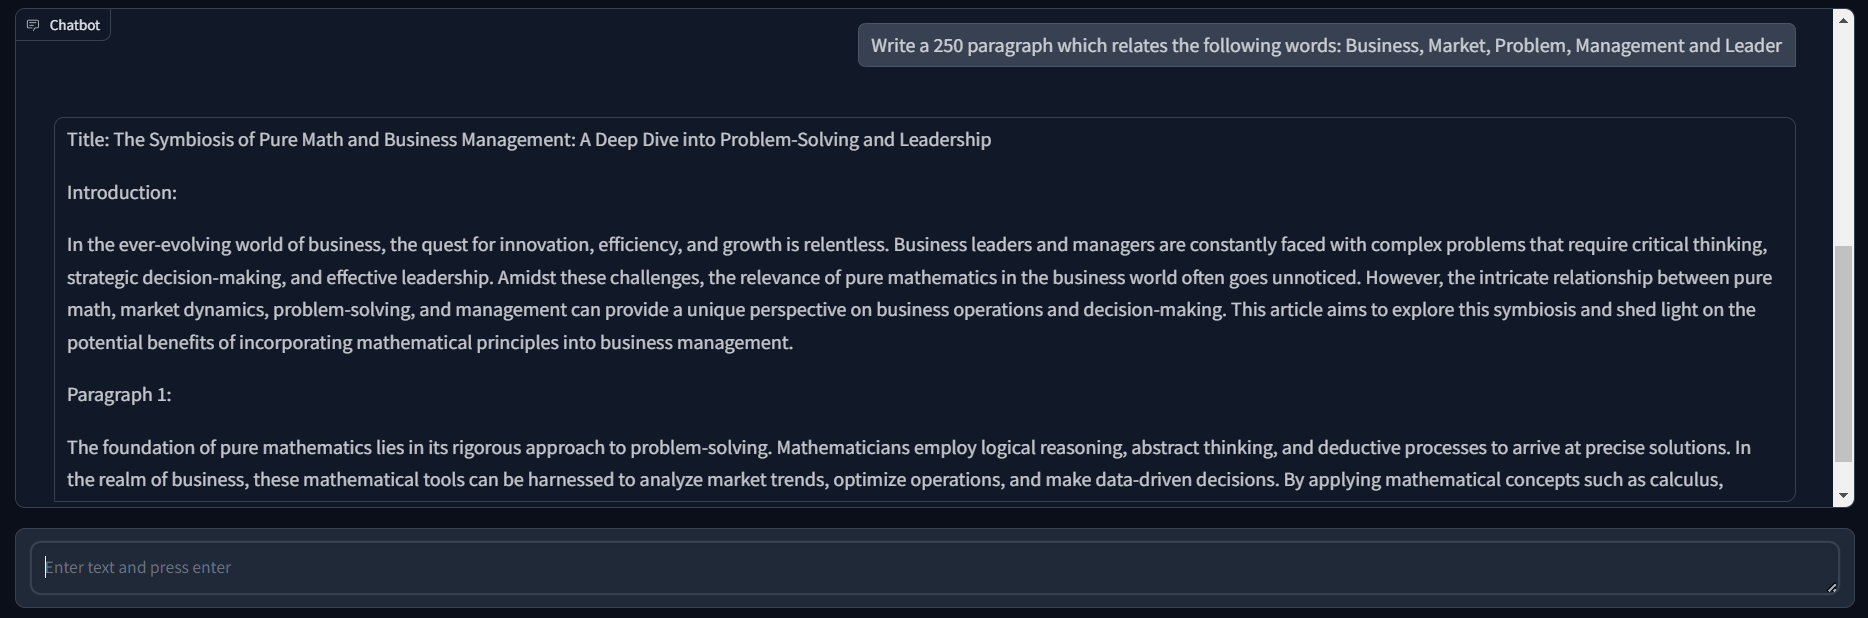